# **Machine Problem No. 2: Predicting House Prices with Multiple Regression**

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
house = pd.read_csv('datasets_house_prices.csv')
house.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


# **1. Data Exploration and Visualization:**

Explanatory Data Analysis

In [90]:
house.describe()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2429.857000,2.993000,48.335000,15.289063,7.190532e+05
std,929.914229,1.424423,29.203384,8.546139,2.789818e+05
min,801.000000,1.000000,0.000000,0.500343,2.159455e+05
25%,1629.500000,2.000000,22.000000,8.475528,4.789045e+05
50%,2430.500000,3.000000,47.000000,15.239628,7.128781e+05
75%,3254.250000,4.000000,74.000000,22.765188,9.680664e+05
max,3997.000000,5.000000,99.000000,29.935715,1.212350e+06


**Data visualization**

Scatter plot

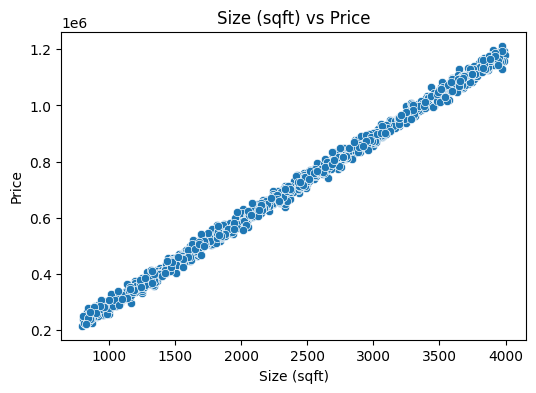

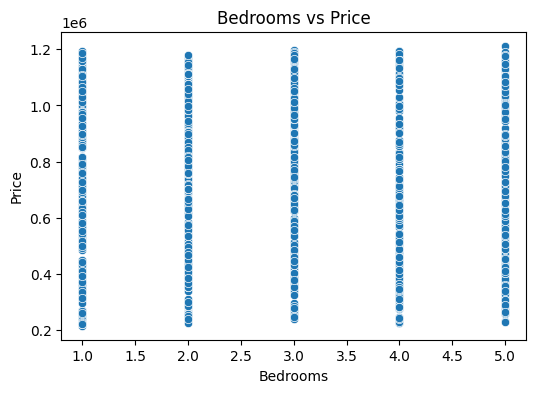

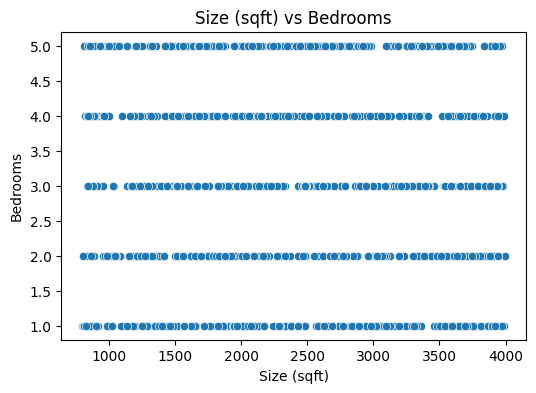

In [91]:
#Scatter plot for Size vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Size (sqft)', y='Price', data=house)
plt.title('Size (sqft) vs Price')
plt.show()

#Scatter plot for Bedrooms vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Bedrooms', y='Price', data=house)
plt.title('Bedrooms vs Price')
plt.show()

#Scatter plot for Bedrooms vs Size
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Size (sqft)', y='Bedrooms', data=house)
plt.title('Size (sqft) vs Bedrooms')
plt.show()


Histograms

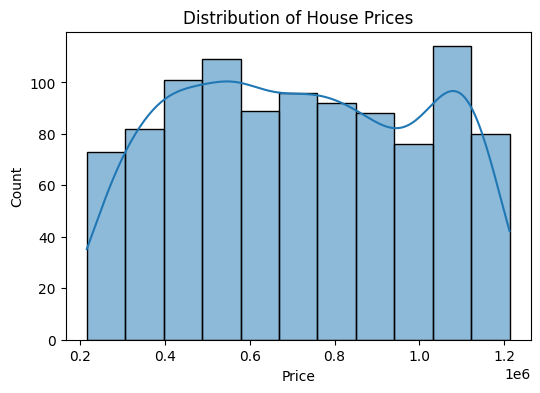

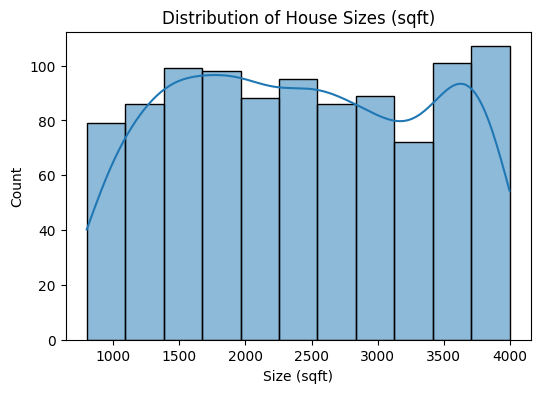

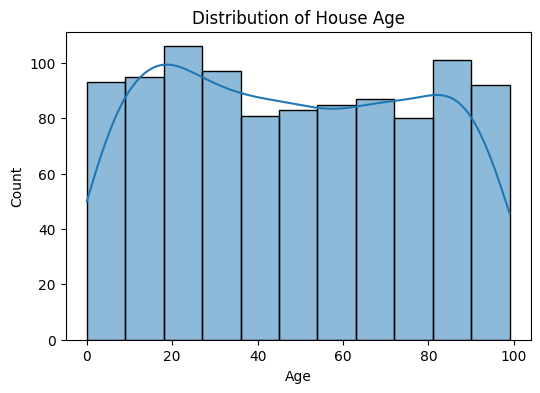

In [92]:
#Histogram for House Prices
plt.figure(figsize=(6, 4))
sns.histplot(house['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

#Histogram for Size (sqft)
plt.figure(figsize=(6, 4))
sns.histplot(house['Size (sqft)'], kde=True)
plt.title('Distribution of House Sizes (sqft)')
plt.show()

#Histogram for Age of Houses
plt.figure(figsize=(6, 4))
sns.histplot(house['Age'], kde=True)
plt.title('Distribution of House Age')
plt.show()

Correlation Matrix

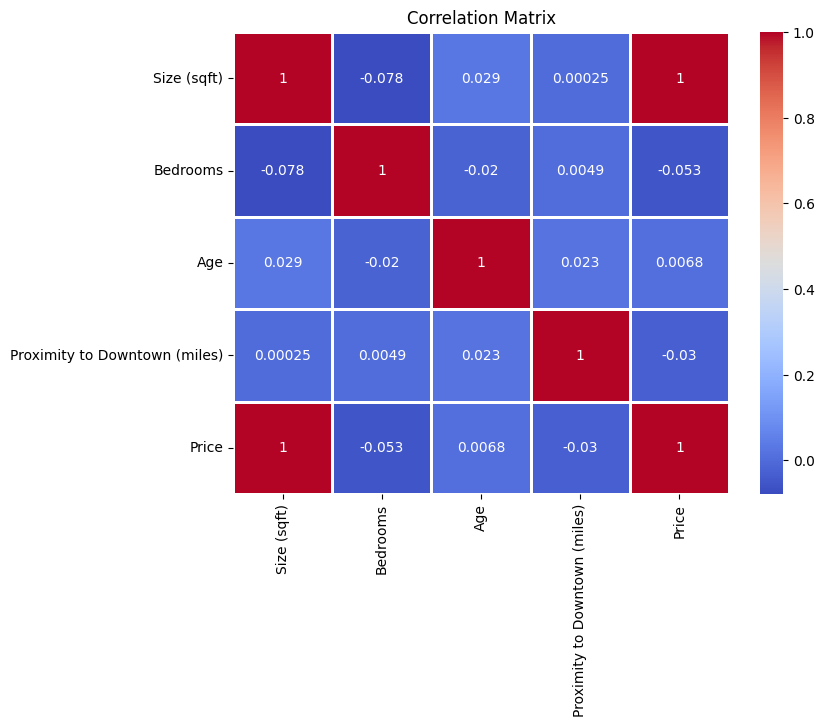

In [93]:
corr_matrix = house.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

# **2. Data Preprocessing:**

Handling Missing Values

In [94]:
#filling missing data
house.fillna(house.mean(), inplace=True)

Data Standardization

In [95]:
#Standardize the features except the Price
scaler = StandardScaler()

house[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] = scaler.fit_transform(
    house[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
)


One-Hot Encoding

In [96]:
#One hot encoding
data = pd.get_dummies(house, drop_first=True)

# **3. Model Development:**

In [97]:
#Target variable is Price
X = house.drop('Price', axis=1)
y = house['Price']

In [98]:
#linear model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test)

# **4. Model Evaluation:**

Performance Metrics

In [101]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#adjusted r squared formulation
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse:2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:4f}")
print(f'Adjusted R-squared: {adjusted_r_squared}')

Mean Squared Error (MSE): 100214724.631287
Root Mean Squared Error: 10010.73
R-squared: 0.998631
Adjusted R-squared: 0.9986128876702134


Model Coefficients

In [103]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                 Coefficient
Size (sqft)                    278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


Actual Vs Predicted prices plot

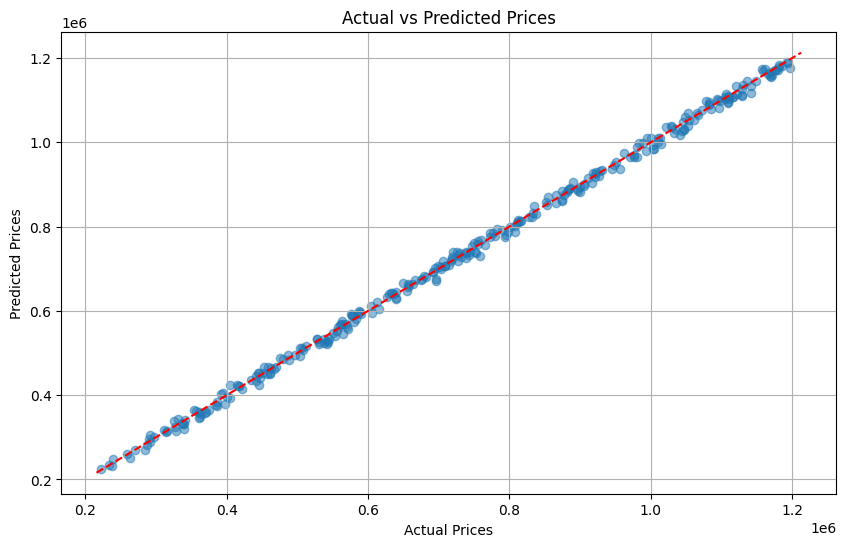

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()